<a href="https://colab.research.google.com/github/Kiruha01/graphs/blob/master/Untitled.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import networkx as nx
from import_dataset import google_directed, ca_undirected, vk_undirected
from algoritms import *
from matplotlib import pyplot as plt
import pickle
google_drive = False

## Google Colab
Run only on Google Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Run when repo will be public
!curl https://raw.githubusercontent.com/Kiruha01/graphs/master/utils.py --output utils.py
!curl https://raw.githubusercontent.com/Kiruha01/graphs/master/import_dataset.py --output import_dataset.py
!curl https://raw.githubusercontent.com/Kiruha01/graphs/master/models.py --output models.py

google_drive = True

## Google

KeyboardInterrupt: 

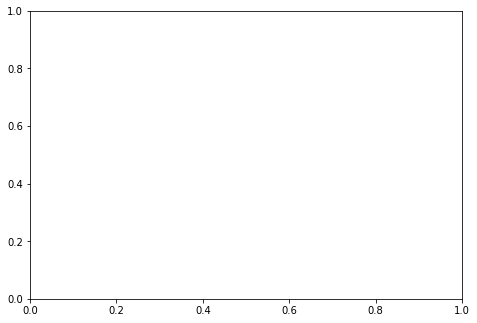

In [6]:
file_path = '/content/drive/MyDrive/datasets/web-Google.txt' if google_drive else '../datasets-2/CA-GrQc.txt'
google_graph = google_directed(file_path)

if not google_drive:
  G=nx.DiGraph()
  elist=list(map(lambda e: e.to_tuple(), google_graph.get_all_edges()))
  G.add_edges_from(elist)
  nx.draw(G, with_labels=True)

In [ ]:
with open('google_results.pickle', 'rb') as f:
	google_results = pickle.load(f)

In [ ]:
google_results = {}

total_v = len(google_graph.get_all_vertices())
total_e = google_graph.num_edges
print(f"v: {total_v}, e: {total_e}")
print("part:", total_e / (2 * (total_v ** 2 - total_v)))

comps = weak_conns(google_graph)
print("Слабая связность", len(comps))
max_weak_comp = max(comps, key=len)
print("Доля вершин:", len(max_weak_comp) / total_v)

strong_comps = strong_conns(google_graph)
print("Сильная связность: ", len(strong_comps))
max_strong_comp = max(strong_comps, key=len)
print("Доля вершин:", len(max_strong_comp) / total_v)

radius, diameter, percentile = evaluate_main_characteristics(google_graph, max_weak_comp)
print("Радиус: ", radius)
print("Диаметр: ", diameter)
print("90 процентиль расстояния: ", percentile)


google_results['total_v'] = total_v
google_results['total_e'] = total_e
google_results['weak_comps'] = comps
google_results['strong_comps'] = strong_comps
google_results['radius'] = radius
google_results['diameter'] = diameter
google_results['percentile'] = percentile


triangles = num_of_triangles(google_graph)
print(f"Число треугольников: {triangles}")
avg, glob = average_and_global_cluster_coefficients(google_graph)
print(f"Средний кластреный коэффициент: {avg}")
print(f"Глобальный кластреный коэффициент: {glob}")

google_results['triangles'] = triangles
google_results['avg_cluster'] = avg
google_results['glob_cluster'] = glob


d = evaluate_vertices_degree(google_graph)
print("MAX степень вершин:", max(d.keys()))
print("MIN степень вершин:", min(d.keys()))
sum = 0
for i in d.items():
	sum += i[0]*len(i[1])
print("avg степень вершин:", sum/total_v)

google_results['max_degree'] =  max(d.keys())
google_results['min_degree'] =  min(d.keys())
google_results['avg_degree'] =  sum/total_v


x, y = [], []
sum = 0
for item in  sorted(d.items()):
	x.append(item[0])
	sum += len(item[1])/total_v
	y.append(sum)


with open('google_results.pickle', 'wb') as f:
	pickle.dump(google_results, f)

In [ ]:
plt.step(x, y, where='post')

In [ ]:
plt.yscale('log')
plt.xscale('log')
plt.step(x, y, where='post')

### B.
1. Удаление случайных x% вершин

In [ ]:
x, y = get_proportions_after_vertices_removal(google_graph)
plt.plot(x, y)

2. Удаление случайных x% вершин наибольшей степени

In [ ]:
x, y = get_proportions_after_vertices_removal(google_graph, del_only_max_degree=True)
plt.plot(x, y)

### Мета-граф

In [ ]:
strong_comps = google_results['strong_comps']
component_links = []
comp_map = {}
for i, v in enumerate(strong_comps):
	for n in v:
		comp_map[n] = i

for c in strong_comps:
	component_links.append(set())
	for ver in c:
		component_links[-1].update({edge.end for edge in google_graph.outgoing_adj_list[ver]})
	component_links[-1] = component_links[-1].difference(set(c))

G=nx.DiGraph()

elist=[]
for idx, comp in enumerate(strong_comps):
	first_node = str(idx)
	end_nodes = set()
	for z in component_links[idx]:
		end_nodes.add(str(comp_map[z]))

	if not end_nodes:
		G.add_node(first_node)

	for z in end_nodes:
		elist.append((first_node, z))

with open('elist.pickle', 'wb') as f:
  pickle.dump(elist, f)
print(strong_comps)
plt.figure(1,figsize = (65, 65))
G.add_edges_from(elist)
nx.draw(G, with_labels=True)

## CA

In [ ]:
file_path = '/content/drive/MyDrive/datasets/CA-AstroPh.txt' if google_drive else 'test_datasets/CA-AstroPh.txt'
ca_graph = ca_undirected(file_path)

if not google_drive:
  G=nx.Graph()
  elist=list(map(lambda e: e.to_tuple(), ca_graph.get_all_edges()))
  G.add_edges_from(elist)
  nx.draw(G, with_labels=True)

In [ ]:
ca_results = {}

total_v = len(ca_graph.get_all_vertices())
total_e = ca_graph.num_edges
print(f"v: {total_v}, e: {total_e}")
print("part:", total_e / (2 * (total_v ** 2 - total_v)))

comps = weak_conns(ca_graph)
print("Слабая связность", len(comps))
max_weak_comp = max(comps, key=len)
print("Доля вершин:", len(max_weak_comp) / total_v)

radius, diameter, percentile = evaluate_main_characteristics(ca_graph, max_weak_comp)
print("Радиус: ", radius)
print("Диаметр: ", diameter)
print("90 процентиль расстояния: ", percentile)


ca_results['total_v'] = total_v
ca_results['total_e'] = total_e
ca_results['weak_comps'] = comps
ca_results['radius'] = radius
ca_results['diameter'] = diameter
ca_results['percentile'] = percentile


triangles = num_of_triangles(ca_graph)
print(f"Число треугольников: {triangles}")
avg, glob = average_and_global_cluster_coefficients(ca_graph)
print(f"Средний кластреный коэффициент: {avg}")
print(f"Глобальный кластреный коэффициент: {glob}")

ca_results['triangles'] = triangles
ca_results['avg_cluster'] = avg
ca_results['glob_cluster'] = glob


d = evaluate_vertices_degree(ca_graph)
print("MAX степень вершин:", max(d.keys()))
print("MIN степень вершин:", min(d.keys()))
sum = 0
for i in d.items():
	sum += i[0]*len(i[1])
print("avg степень вершин:", sum/total_v)

ca_results['max_degree'] =  max(d.keys())
ca_results['min_degree'] =  min(d.keys())
ca_results['avg_degree'] =  sum/total_v


x, y = [], []
sum = 0
for item in  sorted(d.items()):
	x.append(item[0])
	sum += len(item[1])/total_v
	y.append(sum)


with open('ca_results.pickle', 'wb') as f:
	pickle.dump(ca_results, f)

In [ ]:
plt.step(x, y, where='post')

In [ ]:
plt.yscale('log')
plt.xscale('log')
plt.step(x, y, where='post')

### B.
1. Удаление случайных x% вершин

In [ ]:
x, y = get_proportions_after_vertices_removal(ca_graph)
plt.plot(x, y)

2. Удаление случайных x% вершин наибольшей степени

In [ ]:
x, y = get_proportions_after_vertices_removal(ca_graph, del_only_max_degree=True)
plt.plot(x, y)

## VK

In [ ]:
file_path = '/content/drive/MyDrive/datasets/vk.csv' if google_drive else 'test_datasets/vk.csv'
vk_graph = vk_undirected(file_path)

if not google_drive:
  G=nx.Graph()
  elist=list(map(lambda e: e.to_tuple(), vk_graph.get_all_edges()))
  G.add_weighted_edges_from(elist)
  nx.draw(G, with_labels=True)

In [ ]:
vk_results = {}

total_v = len(vk_graph.get_all_vertices())
total_e = vk_graph.num_edges
print(f"v: {total_v}, e: {total_e}")
print("part:", total_e / (2 * (total_v ** 2 - total_v)))

comps = weak_conns(vk_graph)
print("Слабая связность", len(comps))
max_weak_comp = max(comps, key=len)
print("Доля вершин:", len(max_weak_comp) / total_v)

radius, diameter, percentile = evaluate_main_characteristics(vk_graph, max_weak_comp)
print("Радиус: ", radius)
print("Диаметр: ", diameter)
print("90 процентиль расстояния: ", percentile)


vk_results['total_v'] = total_v
vk_results['total_e'] = total_e
vk_results['weak_comps'] = comps
vk_results['radius'] = radius
vk_results['diameter'] = diameter
vk_results['percentile'] = percentile


triangles = num_of_triangles(vk_graph)
print(f"Число треугольников: {triangles}")
avg, glob = average_and_global_cluster_coefficients(vk_graph)
print(f"Средний кластреный коэффициент: {avg}")
print(f"Глобальный кластреный коэффициент: {glob}")

vk_results['triangles'] = triangles
vk_results['avg_cluster'] = avg
vk_results['glob_cluster'] = glob


d = evaluate_vertices_degree(vk_graph)
print("MAX степень вершин:", max(d.keys()))
print("MIN степень вершин:", min(d.keys()))
sum = 0
for i in d.items():
	sum += i[0]*len(i[1])
print("avg степень вершин:", sum/total_v)

vk_results['max_degree'] =  max(d.keys())
vk_results['min_degree'] =  min(d.keys())
vk_results['avg_degree'] =  sum/total_v


x, y = [], []
sum = 0
for item in  sorted(d.items()):
	x.append(item[0])
	sum += len(item[1])/total_v
	y.append(sum)


with open('vk_results.pickle', 'wb') as f:
	pickle.dump(vk_results, f)

In [ ]:
plt.yscale('log')
plt.xscale('log')
plt.step(x, y, where='post')

## B

In [ ]:
x, y = get_proportions_after_vertices_removal(vk_graph)
plt.plot(x, y)

In [ ]:
x, y = get_proportions_after_vertices_removal(vk_graph, del_only_max_degree=True)
plt.plot(x, y)